# KDE-SORT

Jupyter Notebook explaining how to use Kernel Density Estimation to infer the true position of an item from a list of positions by other users.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma # Generalized factorial to real numbers
from scipy.special import factorial
from ipywidgets import interact

First let's define the categories we are going to use. There are 5 tiers in our example: S,A,B,C and D, in decreasig order of relevance. We want to know how relevant a given item is, based on individual rankings of other users.

In [92]:
tiers = {"S":0.5,"A":1.5,"B":2.5,"C":3.5,"D":4.5}

Let's say 3 people have already categorized the item: 

In [93]:
item_rankings = ["S","A","C"]

Let's plot this ranks:

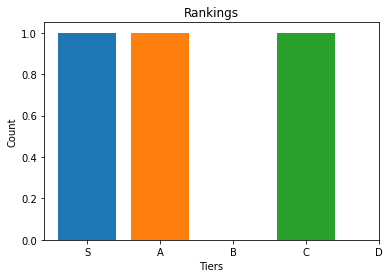

In [94]:
for ranking in item_rankings:
    plt.bar(tiers[ranking],1)

plt.title("Rankings")
plt.xlabel("Tiers")
plt.ylabel("Count")

x_ticks = []
x_ticks_labels = []
for tier in tiers:
    x_ticks.append(tiers[tier])
    x_ticks_labels.append(tier)
    
plt.xticks(x_ticks,x_ticks_labels)

plt.show()

Now, to do the Kernel Density Estimation, we need to generate a distribution of probability for each individual position. Let's do it using a Gaussian probability distribution (normalized for the interval).

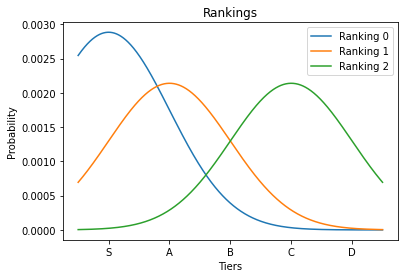

In [120]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

xrange = np.linspace(0,5,1000)
for i,item in enumerate(item_rankings):
    distribution = gaussian(xrange, mu = tiers[item], sig = 1.0)
    distribution /= np.sum(distribution)
    plt.plot(xrange,distribution, label = "Ranking " + str(i))


plt.title("Rankings")
plt.xlabel("Tiers")
plt.ylabel("Probability")
plt.xticks(x_ticks,x_ticks_labels)

plt.legend()    
plt.show()

Let's compute the sum of all this individual probability distributions

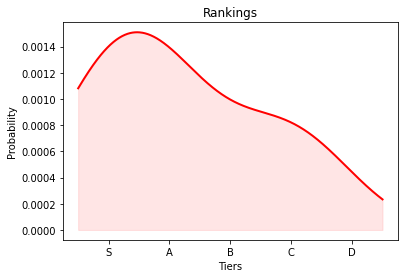

In [154]:
sum_distribution = np.zeros(1000)

xrange = np.linspace(0,5,1000)
for i,item in enumerate(item_rankings):
    distribution = gaussian(xrange, mu = tiers[item], sig = 1.0)
    distribution /= np.sum(distribution)
    sum_distribution += distribution

sum_distribution /= np.sum(sum_distribution)

plt.title("Rankings")
plt.xlabel("Tiers")
plt.ylabel("Probability")
plt.xticks(x_ticks,x_ticks_labels)
    
plt.plot(xrange,sum_distribution, color = "red", linewidth = 2)
plt.fill_between(xrange,np.zeros(1000),sum_distribution, color = "red", alpha = 0.1)
plt.show()

Now, we want to know the median value of the distribution.

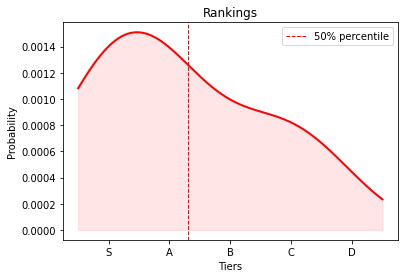

In [153]:
percentile = 0

for i,bin in enumerate(sum_distribution):
    percentile += bin
    if percentile >= 0.5:
        plt.axvline(xrange[i], linewidth = 1, linestyle = "--", color = "red", label = "50% percentile")
        break;

plt.title("Rankings")
plt.xlabel("Tiers")
plt.ylabel("Probability")
plt.xticks(x_ticks,x_ticks_labels)
    
plt.plot(xrange,sum_distribution, color = "red", linewidth = 2)
plt.fill_between(xrange,np.zeros(1000),sum_distribution, color = "red", alpha = 0.1)
plt.legend()
plt.show()

Let's combine all of this into a single interactive algorithm.

In [164]:
@interact(ranking_0 = ["S","A","B","C","D"], ranking_1 = ["S","A","B","C","D"],
            ranking_2 = ["S","A","B","C","D"], error = (0.5,2.5,0.1))

def KDESort(ranking_0 = "S", ranking_1 = "A",ranking_2 = "C", error = 1.0):
    
    xrange = np.linspace(-5,10,1000)
    sum_distribution = np.zeros(1000)
    for i,item in enumerate([ranking_0,ranking_1,ranking_2]):
        distribution = gaussian(xrange, mu = tiers[item], sig = error)
        distribution /= np.sum(distribution)
        sum_distribution += distribution
        plt.plot(xrange,distribution)
    
    plt.plot(xrange,sum_distribution, color = "red", linewidth = 2)
    plt.fill_between(xrange,np.zeros(1000),sum_distribution, color = "red", alpha = 0.1)
    
    percentile = 0

    for i,bin in enumerate(sum_distribution/np.sum(sum_distribution)):
        percentile += bin
        if percentile >= 0.5:
            plt.axvline(xrange[i], linewidth = 1, linestyle = "--", color = "red", label = "50% percentile")
            break;
    
    plt.xlim(-1,6)
    
    plt.title("Rankings")
    plt.xlabel("Tiers")
    plt.ylabel("Probability")
    plt.xticks(x_ticks,x_ticks_labels)
    
    plt.legend()    
    plt.show()

interactive(children=(Dropdown(description='ranking_0', options=('S', 'A', 'B', 'C', 'D'), value='S'), Dropdow…